# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how="left", on=['Mouse ID'])

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(merged_data["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]

# Round the values to two decimal places
duplicate_mice = duplicate_mice.round(2)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print("Duplicate mouse IDs:")
duplicate_mice

Duplicate mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.00,0,Propriva,Female,21,26
360,g989,5,47.57,0,Propriva,Female,21,26
681,g989,10,49.88,0,Propriva,Female,21,26
869,g989,15,53.44,0,Propriva,Female,21,26
1111,g989,20,54.66,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989' 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == duplicate_mouse_id]

# Round the values to two decimal places
duplicate_mouse_data = duplicate_mouse_data.round(2)

# Display the data for the duplicate mouse ID
print("Data for the duplicate mouse ID:")
duplicate_mouse_data

Data for the duplicate mouse ID:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.00,0,Propriva,Female,21,26
137,g989,0,45.00,0,Propriva,Female,21,26
329,g989,5,48.79,0,Propriva,Female,21,26
360,g989,5,47.57,0,Propriva,Female,21,26
620,g989,10,51.75,0,Propriva,Female,21,26
681,g989,10,49.88,0,Propriva,Female,21,26
815,g989,15,51.33,1,Propriva,Female,21,26
869,g989,15,53.44,0,Propriva,Female,21,26
950,g989,20,55.33,1,Propriva,Female,21,26
1111,g989,20,54.66,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.loc[merged_data['Mouse ID'] != 'g989']
cleaned_data = cleaned_data.round(2)
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,f932,0,45.00,0,Ketapril,Male,15,29
2,g107,0,45.00,0,Ketapril,Female,2,29
3,a457,0,45.00,0,Ketapril,Female,11,30
4,c819,0,45.00,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.58,2,Capomulin,Male,12,25
1889,u364,45,31.02,3,Capomulin,Male,18,17
1890,p438,45,61.43,1,Ceftamin,Female,11,26
1891,x773,45,58.63,4,Placebo,Female,21,30


In [6]:
# Display the updated number of unique mice IDs
cleaned_mice_count = len(cleaned_data["Mouse ID"].unique())
print("Number of unique mice IDs after cleaning:", cleaned_mice_count)

Number of unique mice IDs after cleaning: 248


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Round the values to two decimal places
summary_stats = summary_stats.round(2)

# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

# Display the summary statistics table
print("Summary Statistics of Tumor Volume by Drug Regimen:")
summary_stats

Summary Statistics of Tumor Volume by Drug Regimen:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.56,8.28,0.60
Naftisol,54.33,52.50,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.44,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    **{'Standard Deviation': 'std'},
    SEM='sem'
).round(2)


# Add a column header for 'Tumor Volume (mm3)'
summary_stats.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_stats.columns])

# Display the summary statistics table
print("Summary Statistics of Tumor Volume by Drug Regimen:")
summary_stats


Summary Statistics of Tumor Volume by Drug Regimen:


Tumor Volume (mm3)                                         
                           Mean Median Variance Standard Deviation   SEM
Drug Regimen                                                            
Capomulin                 40.68  41.56    24.95               4.99  0.33
Ceftamin                  52.59  51.78    39.29               6.27  0.47
Infubinol                 52.88  51.82    43.13               6.57  0.49
Ketapril                  55.24  53.70    68.56               8.28  0.60
Naftisol                  54.33  52.50    66.17               8.13  0.60
Placebo                   54.03  52.29    61.17               7.82  0.58
Propriva                  52.32  50.44    43.85               6.62  0.54
Ramicane                  40.22  40.67    23.49               4.85  0.32
Stelasyn                  54.23  52.43    59.45               7.71  0.57
Zoniferol                 53.24  51.82    48.53               6.97  0.52

## Bar and Pie Charts

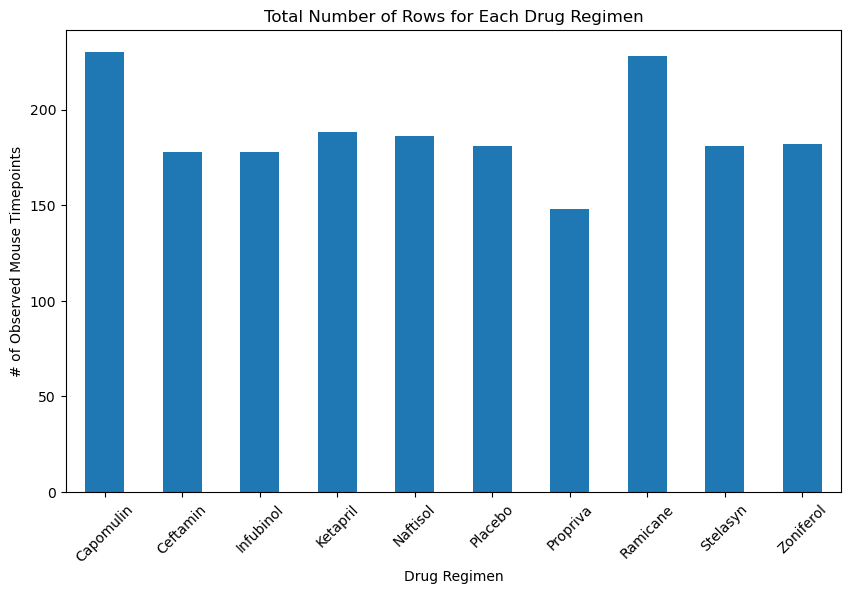

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by 'Drug Regimen' and count the number of rows
regimen_counts = cleaned_data.groupby('Drug Regimen').size()

# Generate the bar plot using Pandas
regimen_counts.plot.bar(figsize=(10, 6))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()


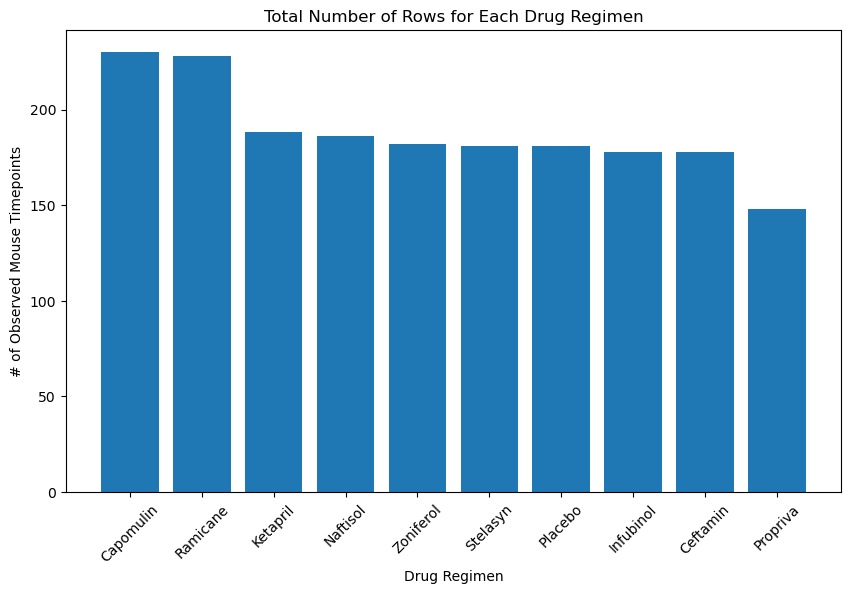

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by 'Drug Regimen' and count the number of rows
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

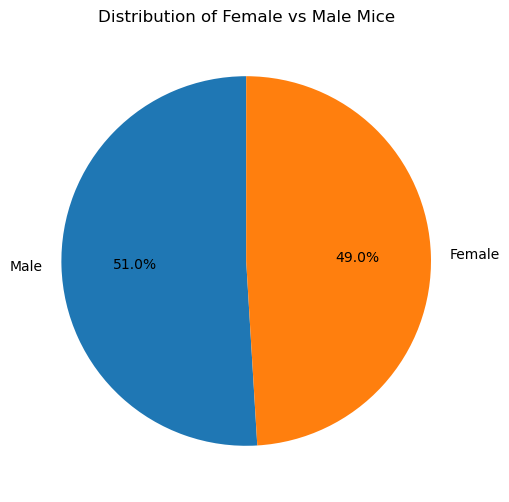

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
gender_counts = cleaned_data['Sex'].value_counts()

# Generate the pie plot using Pandas
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')

plt.show()

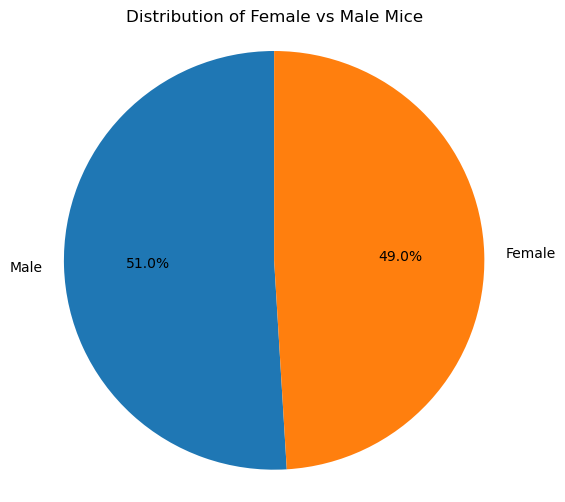

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of male and female mice
gender_counts = cleaned_data['Sex'].value_counts()

# Generate the pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
max_tp = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(cleaned_data, max_tp, on=['Mouse ID', 'Timepoint'], how='right')
final_tumor_volume = final_tumor_volume.reset_index()

# Round the tumor volume to 2 decimal places
final_tumor_volume['Tumor Volume (mm3)'] = final_tumor_volume['Tumor Volume (mm3)'].round(2)

final_tumor_volume.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.97,2,Infubinol,Female,20,23
1,1,a251,45,65.53,1,Infubinol,Female,21,25
2,2,a262,45,70.72,4,Placebo,Female,17,29
3,3,a275,45,63.00,3,Ceftamin,Female,20,28
4,4,a366,30,63.44,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_volume.append(volumes)
 
    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
        
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    # Find the potential outliers for the current treatment
    potential_outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]

    # Store the potential outliers in the dictionary

    # Print the potential outliers for each treatment
    print(f"{drug}'s potential outliers: {potential_outliers}")
   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.32
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


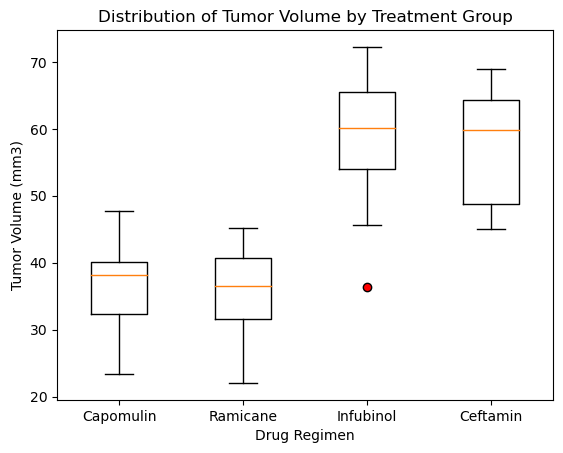

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of treatment groups
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to store the tumor volume data for each treatment group
tumor_volume_data = []

# Iterate over each treatment group and retrieve the tumor volume data
for treatment in treatment_groups:
    volume_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(volume_data)

# Create the box plot
plt.boxplot(tumor_volume_data, labels=treatment_groups, flierprops={'marker': 'o', 'markerfacecolor': 'red'})

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume by Treatment Group')

# Display the plot
plt.show()

## Line and Scatter Plots

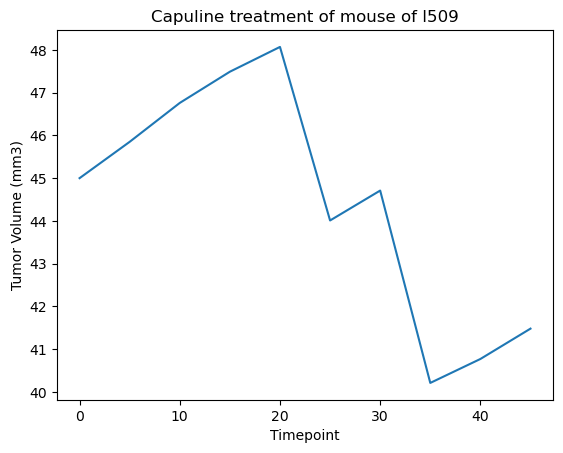

In [32]:
# To generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin,
# Filter the data for a single mouse treated with Capomulin
mouse_id = capomulin_data.loc[capomulin_data['Mouse ID'] == 'l509']
                                  
# Create the line plot
plt.plot(mouse_id['Timepoint'], mouse_id['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capuline treatment of mouse of l509")

# Display the plot
plt.show()

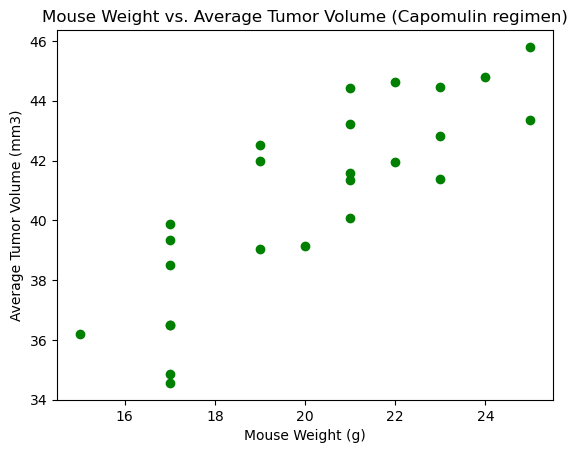

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weights for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='green')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin regimen)')

# Display the plot
plt.show()

## Correlation and Regression

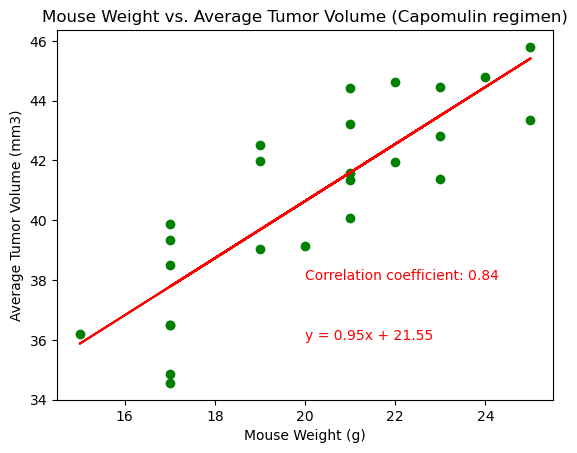

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weights for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weights, average_tumor_volume)
correlation_coefficient = correlation[0]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, average_tumor_volume)

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='green')

# Add the linear regression line to the plot
regress_values = mouse_weights * slope + intercept
plt.plot(mouse_weights, regress_values, color='red')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin regimen)')

# Display the correlation coefficient and linear regression equation on the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
correlation_label = f"Correlation coefficient: {correlation_coefficient:.2f}"
plt.annotate(equation, (20, 36), color='red')
plt.annotate(correlation_label, (20, 38), color='red')

# Display the plot
plt.show()